# WEEK01

## 1、install libraries

### 1.1 create a virtual environment

In [ ]:
# using conda
conda create -n audio_env python-3.12
conda activate audio_env

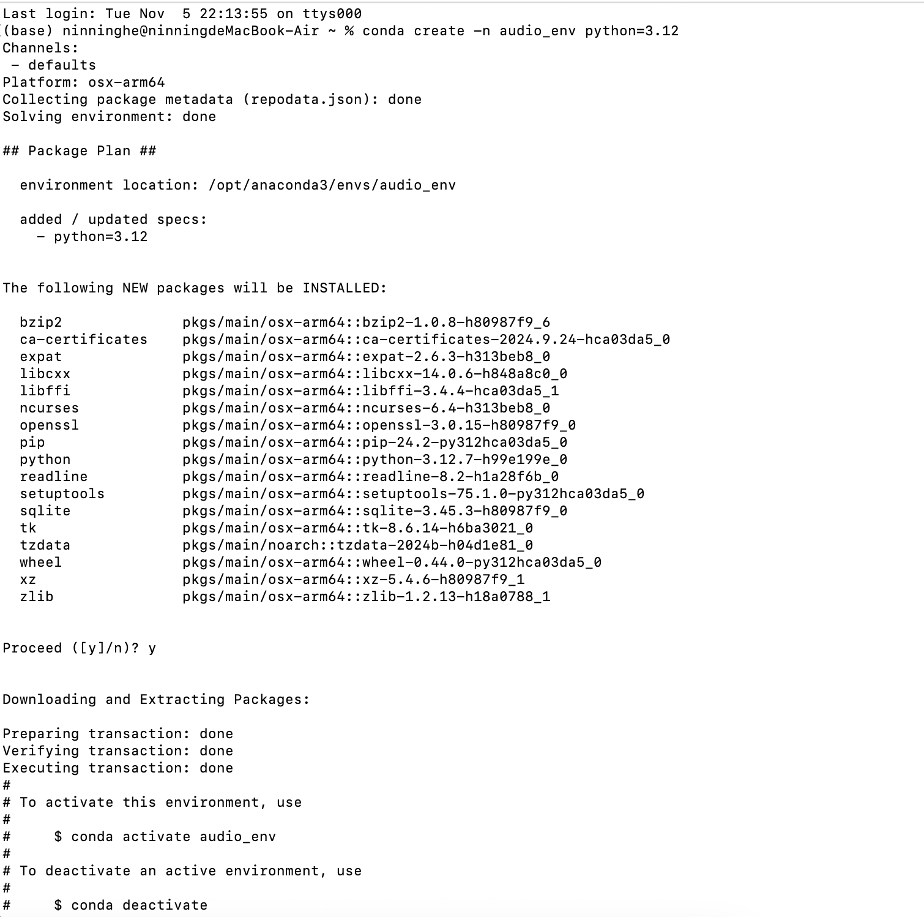

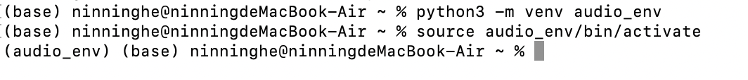

### 1.2 learn to install package using conda and pip

In [ ]:
# update conda
conda update -n base -c defaults conda

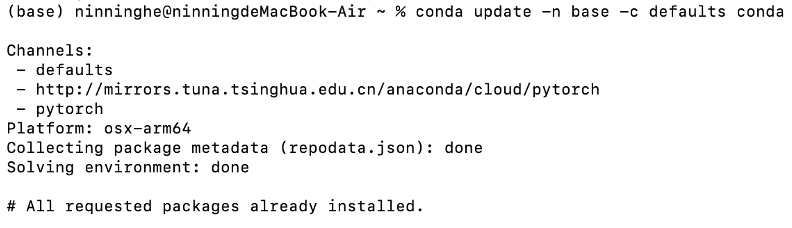

In [ ]:
# install packages with conda(numpy、matolotlib、scipy)
conda install numpy matplotlib scipy

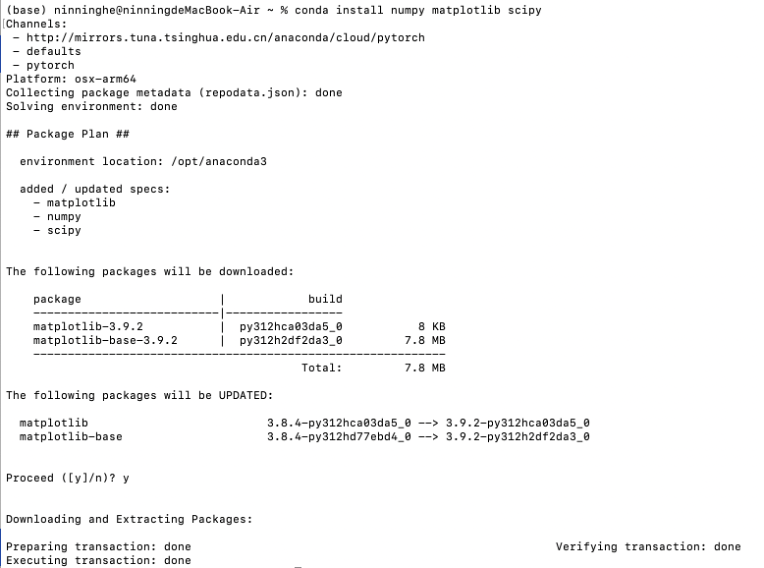

In [ ]:
# update pip
pip install --upgrade pip

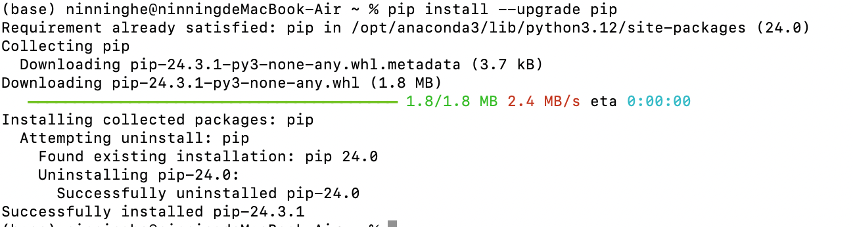

In [ ]:
# install librosa、pydub
pip install librosa pydub

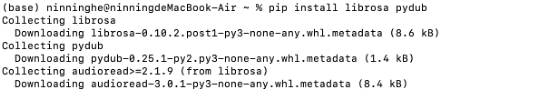

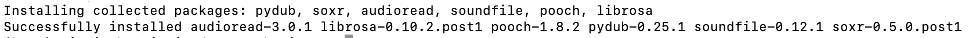

In [ ]:
# check all installed
import numpy,matplotlib,scipy,librosa,pydub
print('All libraries are install successfully!')

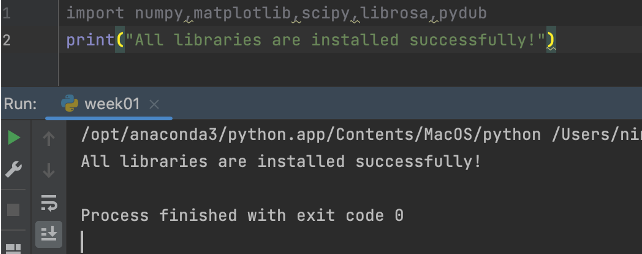

## 2、explore audio data basics

### 2.1 define audio terms

#### 2.1.1 sampling rate:
- 指每秒采集的声音样本数量（每秒对音频信号进行采样的次数），以赫兹（Hz）为单位。采样率越高，听到的声音越真实。
- 在模拟信号向数字信号进行转换的过程中，数字转换设备（声卡 或 IO）在每秒内对连续信号采集到的数量，单位 Hz
- 其中，44.1kHz 表示每秒采集 44,100 个声音样本，是专业音频中的最低采样率，为标准CD音质
- 人耳的声音频率范围是20Hz-20kHz

#### 2.1.2 Amplitude
- 表示音频波形的高度，直接影响声音的响度。振幅越高，声音越响。
- 例如，录音时提高音量会增加音频波形的振幅。

#### 2.1.3 Channels
- 指音频的通道数，通常为单声道（Mono）或立体声（Stereo）。单声道音频只有一个声道，而立体声音频则有两个声道，使声音有左右方向感。
- 例如，歌曲一般是立体声，而电话录音通常是单声道。

#### 2.1.4 Bit Depth
- 指每个音频样本使用的位数。当一个信号被采样时，它需要用比特形式来存储采样的音频信息，决定了可以存储多少信息。
- 描述声音的精度，比特深度越高，音频的动态范围越大，音质也更好。
- 比如，CD 音频的比特深度通常是 16 位，而专业音频录音常用 24 位。
- 位深度也直接关系到信号噪声比的大小，直接影响到所录制信号的整体动态范围。

#### 2.1.5 Frequence
- 声音的频率决定了它的音调，即高音或低音。
- 频率以赫兹（Hz）为单位，频率越高，音调越高。

#### 2.1.6 Frame帧
- 一个声音的基本数据单元，其长度为采样位数和通道数的乘积

### 2.2 download and visualize a few short audio samples

#### 2.2.1 waveform波形图（时域图）
- 表现的是一段音频在一段时间内音量的变化。
- 波形实质上是将各个频率的波形叠加在了一起（波形是由各频率不同幅值和相位的简单正弦波复合叠加得到的。）
- 波形图的纵轴代表振幅（音量），横轴代表时间，而波纹的形状和频率可以表示音色和音调变化。

#### 2.2.2 spectorgram时频图
- 先将语音信号作傅里叶变换STFT，然后以横轴为时间，纵轴为频率，用颜色表示幅值。
- 表示信号的频率、幅度随时间的变化。

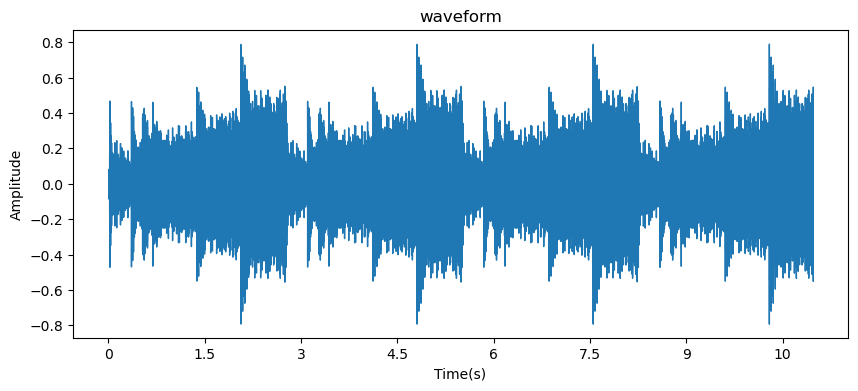

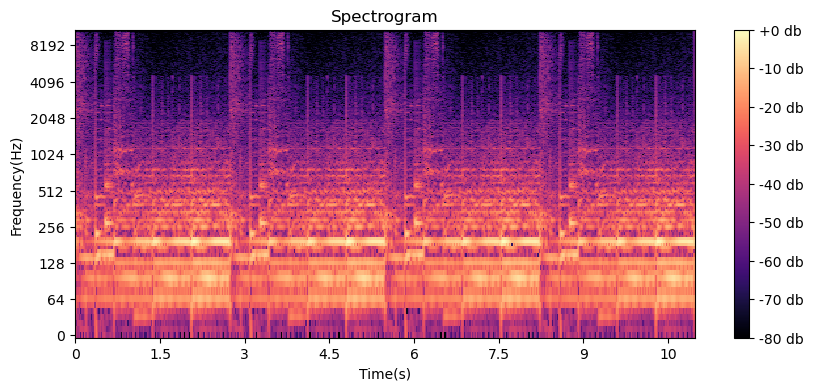

In [9]:
# sample01

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# load an audio file
audio_path = '/Users/ninninghe/PycharmProjects/audioDL/audiosample/sample01_10s.wav'
y,sr = librosa.load(audio_path)
# y代表音频时间序列，即音频波形的样本值
# sr代表采样率，load 会自动将其重采样为 22050 Hz，除非通过 sr 参数指定其他采样率

# plot waveform
plt.figure(figsize=(10,4)) #创建一个10*4的图形窗口
librosa.display.waveshow(y,sr=sr) #绘制音频波形图
plt.title('waveform') #设置图表的标题为“waveform”
plt.xlabel('Time(s)') #设置x轴标签
plt.ylabel('Amplitude') #设置y轴标签
plt.show() #显示图表

# create spectrograms时频图 to visualize frequencies over time
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)),ref=np.max)
## librosa.stft(y):对音频信号y进行短时傅立叶变换STFT
## librosa.amplitude_to_db 函数将STFT的结果转换为分贝单位。
## ref=np.max 表示参考值设置为 STFT 结果的最大幅度值，这样转换后的 dB 值将是相对于最大幅度值的相对 dB 值。
plt.figure(figsize=(10,4))
librosa.display.specshow(D,sr=sr,x_axis='time',y_axis='log')
# 绘制时频图
## D是计算好的频谱数据，以dB为单位
## sr是音频的采样率，以正确标记时间轴
## x_axis和y_axis是x,y轴的显示类型
## y轴以对数刻度显示频率，如此低频部分会被放大，高频部分会被压缩
plt.colorbar(format='%+2.0f db') #添加颜色条
## format='%+2.0f db' 设置颜色条标签的格式，%+2.0f显示为带有正负号的整数，小数位后两位省略
plt.title('Spectrogram')
plt.xlabel('Time(s)')
plt.ylabel('Frequency(Hz)')
plt.show()

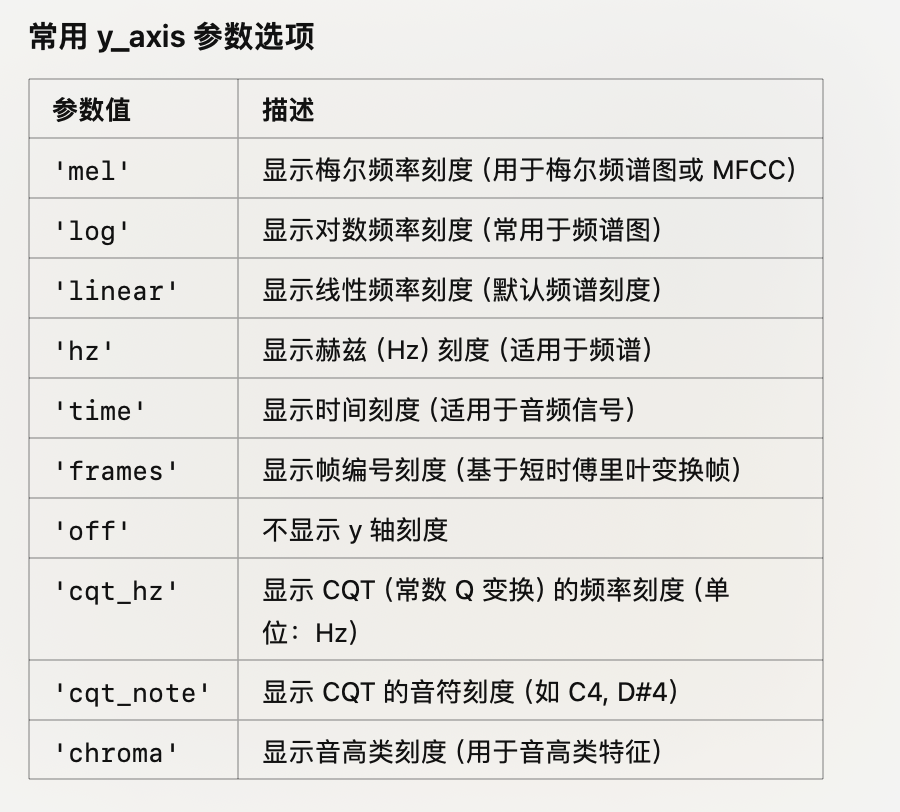

y_axis='frames',表示mfcc的维度

/var/folders/55/47t2007x4sj8vmqsdt67n1fm0000gn/T/ipykernel_78836/2703756814.py:10: UserWarning: PySoundFile failed. Trying audioread instead.
  y,sr = librosa.load(audio_path)
/opt/anaconda3/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


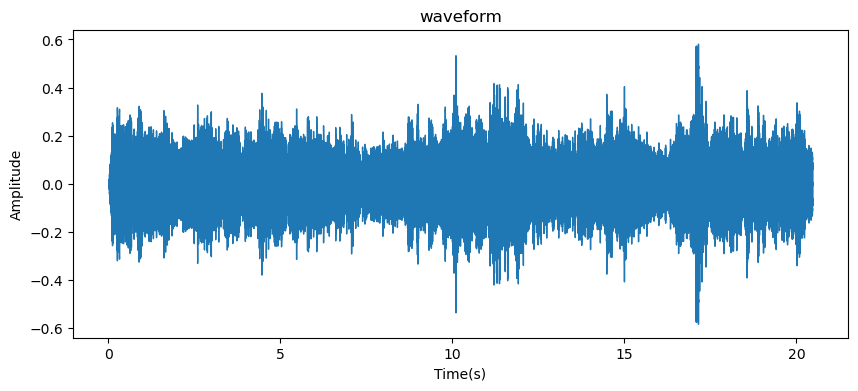

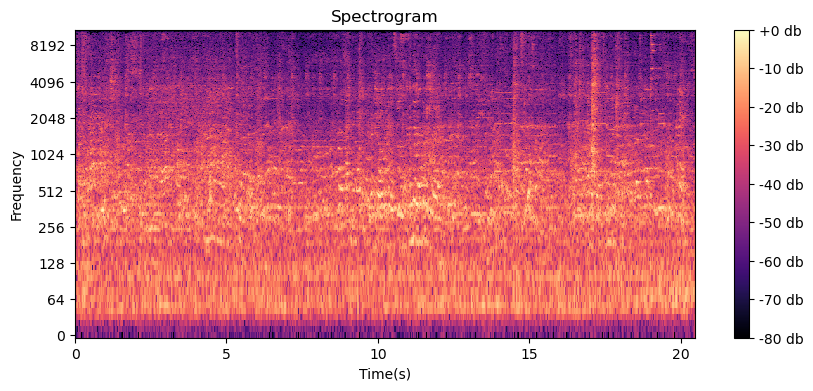

In [56]:
# sample02
!pip install pysoundfile audioread
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# load audio
audio_path = '/Users/ninninghe/PycharmProjects/audioDL/audiosample/sample02_20s.m4a'
y,sr = librosa.load(audio_path)

# plot waveform
plt.figure(figsize=(10,4))
librosa.display.waveshow(y,sr=sr)
plt.title('waveform')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.show()

# plot spectrogram
D=librosa.amplitude_to_db(np.abs(librosa.stft(y)),ref=np.max)
plt.figure(figsize=(10,4))
librosa.display.specshow(D,sr=sr,x_axis='time',y_axis='log')
plt.colorbar(format='%+2.0f db')
plt.title('Spectrogram')
plt.xlabel('Time(s)')
plt.ylabel('Frequency')
plt.show()

#### 2.2.1 疑问
m4a格式用librosa处理时，是需要转换为wav格式吗

### 2.3 segment and convert to mono

#### 2.3.1 segment audio into fixed intervals(2s)

In [77]:
import librosa

# load sample01
audio_path1 = '/Users/ninninghe/PycharmProjects/audioDL/audiosample/sample01_10s.wav'
y1,sr1 = librosa.load(audio_path1)

# segment audio
def segment_audio(y, sr, segment_duration=2):
    # 计算每个片段的样本数量=（采样率：每秒采样的样本数量 * 2秒）
    segment_samples = segment_duration * sr
    # 将音频数据分割成片段，每个片段的长度为 segment_samples
    segments = [y[i:i + segment_samples] for i in range(0, len(y), segment_samples)]
    # 返回分割后的音频片段列表
    return segments

print(segment_audio(y1,sr1))

[array([ 0.03814099,  0.07608105,  0.05748347, ...,  0.00328831,
       -0.0109132 , -0.02291261], dtype=float32), array([-0.03423131, -0.04634247, -0.0704612 , ...,  0.21231759,
        0.2090456 ,  0.2115537 ], dtype=float32), array([0.21586844, 0.20985803, 0.20197836, ..., 0.17198189, 0.17069069,
       0.17509726], dtype=float32), array([ 0.18833312,  0.19093311,  0.19201176, ..., -0.04712635,
       -0.05331401, -0.05980216], dtype=float32), array([-0.06741721, -0.07584269, -0.08520722, ...,  0.1886836 ,
        0.1998238 ,  0.2108792 ], dtype=float32), array([0.22118005, 0.23166916, 0.24183357, ..., 0.14670143, 0.24851717,
       0.54763234], dtype=float32)]


#### 2.3.2 convert stereo audio to mono

In [81]:
# convert to mono
def convert_to_mono(audio_path):
    y, sr = librosa.load(audio_path, mono=False)  # 加载音频，不强制转换为单声道
    if y.ndim > 1:  # 如果音频数据是多维的（即立体声）
        y = librosa.to_mono(y)  # 将音频转换为单声道
    return y, sr  # 返回转换后的音频数据和采样率

print(convert_to_mono(audio_path1))

# dtype=float32 是用于指定数组或变量的数据类型的参数，它表示 32位浮点数。
# 在librosa中，dtype=float32 常用于表示音频信号的样本值。
# 使用 float32 可以兼顾内存占用和计算精度，适合大量音频数据的处理需求。

(array([0.03814099, 0.07608104, 0.05748346, ..., 0.14670143, 0.24851716,
       0.5476324 ], dtype=float32), 22050)


### 2.4 practice

- segment
- normalize the waveform
- visualize the segmented waveforms and spectrograms
- plot normalized waveform and spectorgram

In [11]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# segment audio
def segment_audio(y,sr,sample_duration=2):
    # 每个片段的样本数量
    segment_sample = sr * sample_duration
    # 切割后的片段列表
    segment = [y[i:i+segment_sample] for i in range(0,len(y),segment_sample)]
    return segment

# normalize
def normalize_audio(y):
    # 把振幅缩放到[-1,1]
    return y/np.max(np.abs(y))

# visualize the segmented waveforms and spectrograms
def waveform(y,sr,title):
    plt.figure(figsize=(10,4))
    librosa.display.waveshow(y,sr=sr)
    plt.title(title) # 动态变化标题
    plt.xlabel('Time(s)')
    plt.ylabel('Amplitude')
    plt.show()

def spectrogram(y,sr,title):
    plt.figure(figsize=(10,4))
    # STFT，同时转换为db单位,再进行绘制时频图(y轴以log刻度显示为频率）
    D=librosa.amplitude_to_db(np.abs(librosa.stft(y)),ref=np.max)
    librosa.display.specshow(D,sr=sr,x_axis='time',y_axis='log')
    plt.title(title)
    plt.xlabel('Time(s)')
    plt.ylabel('Frequency(Hz)')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

# plot normalized waveform for a simple segment and generate its spectrogram
audio_path1 = '/Users/ninninghe/PycharmProjects/audioDL/audiosample/sample01_10s.wav'
y1,sr1 = librosa.load(audio_path1)

In [114]:
segments = segment_audio(y1, sr1, sample_duration=2)
print(segments)

[array([ 0.03814099,  0.07608105,  0.05748347, ...,  0.00328831,
       -0.0109132 , -0.02291261], dtype=float32), array([-0.03423131, -0.04634247, -0.0704612 , ...,  0.21231759,
        0.2090456 ,  0.2115537 ], dtype=float32), array([0.21586844, 0.20985803, 0.20197836, ..., 0.17198189, 0.17069069,
       0.17509726], dtype=float32), array([ 0.18833312,  0.19093311,  0.19201176, ..., -0.04712635,
       -0.05331401, -0.05980216], dtype=float32), array([-0.06741721, -0.07584269, -0.08520722, ...,  0.1886836 ,
        0.1998238 ,  0.2108792 ], dtype=float32), array([0.22118005, 0.23166916, 0.24183357, ..., 0.14670143, 0.24851717,
       0.54763234], dtype=float32)]


segment 1:


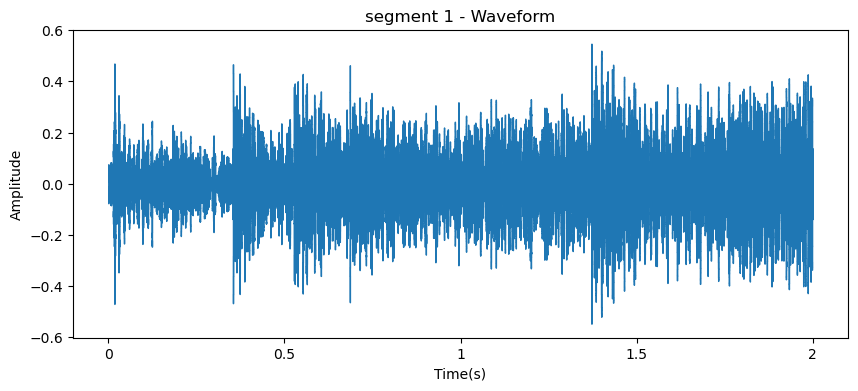

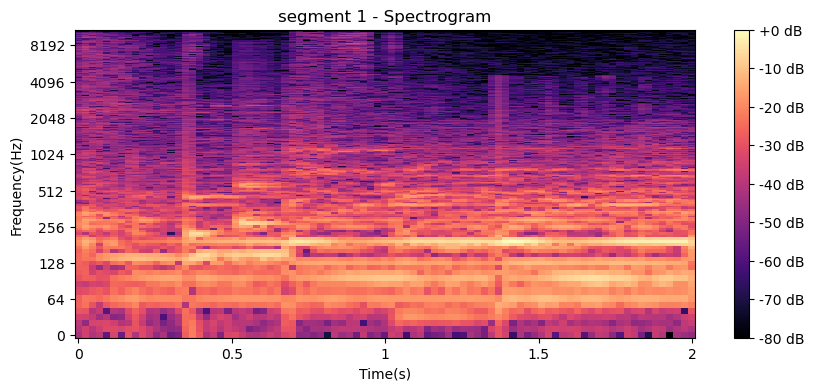

segment 2:


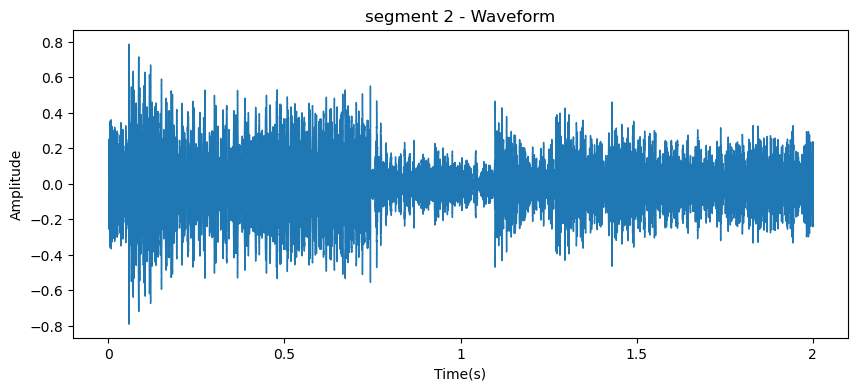

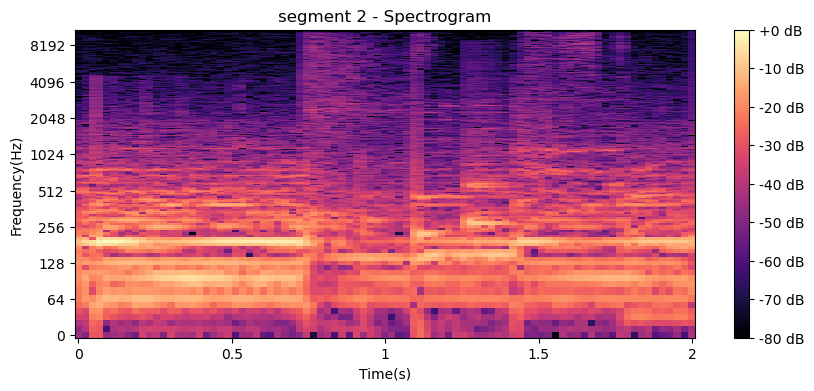

segment 3:


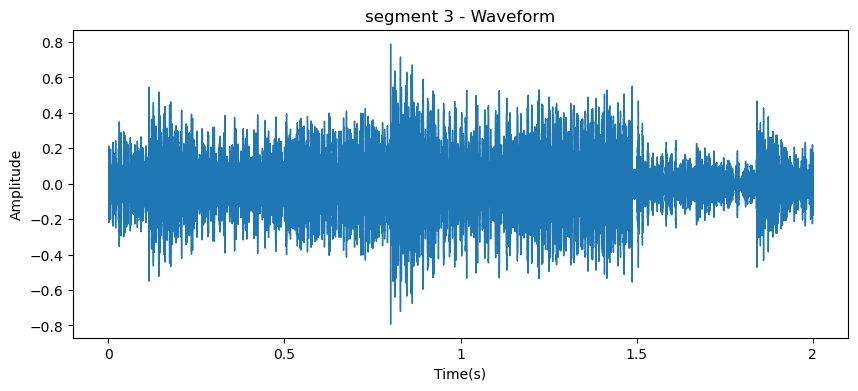

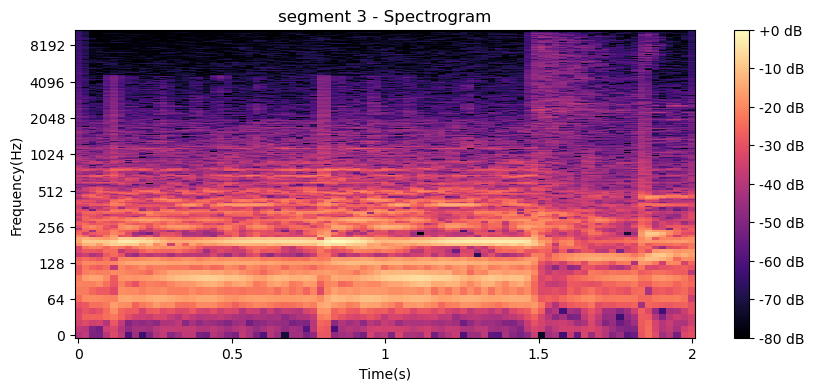

segment 4:


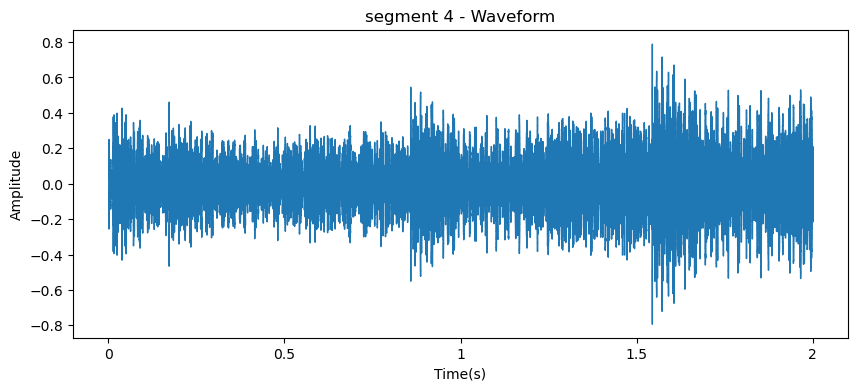

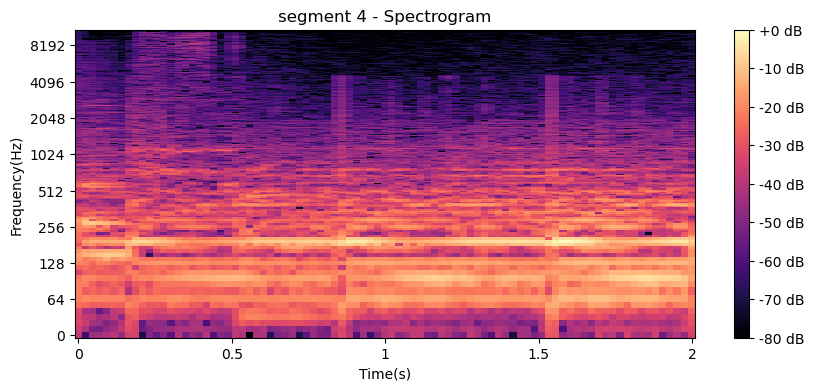

segment 5:


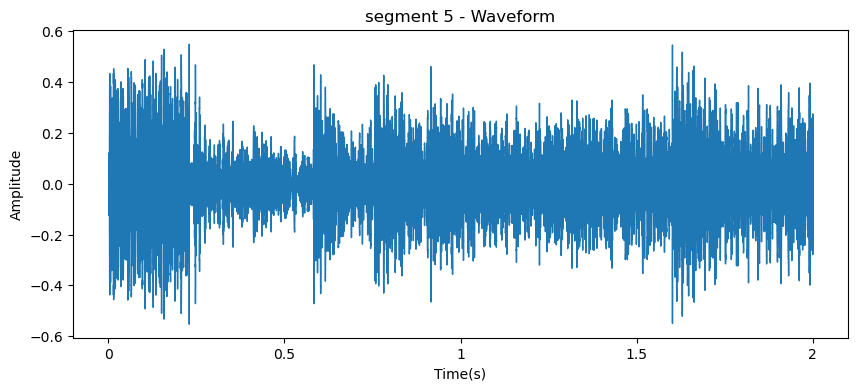

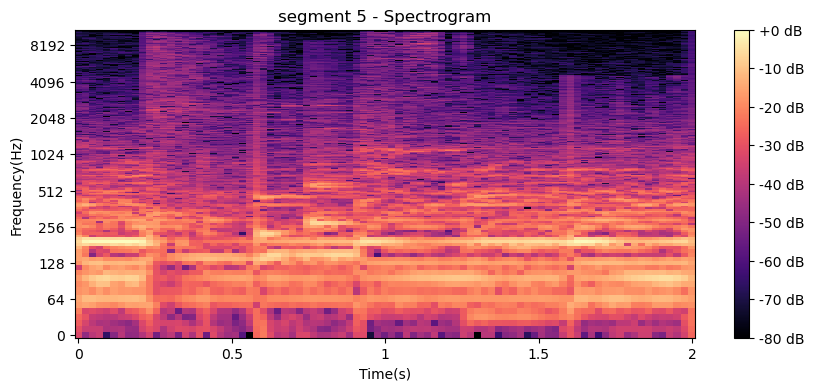

segment 6:


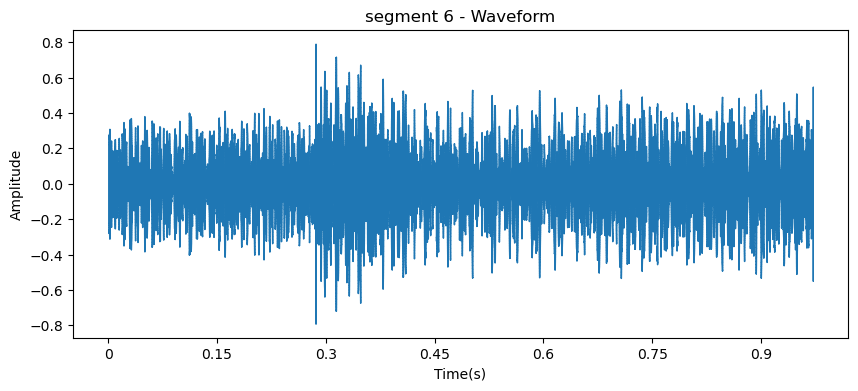

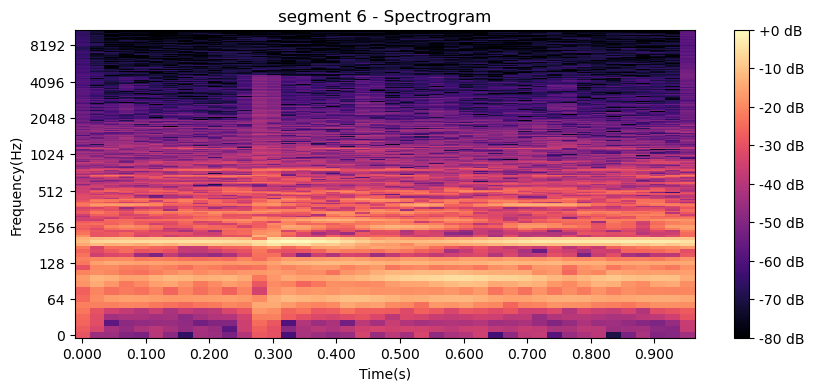

In [108]:
# visualize the segmented waveform and spectrogram
segments = segment_audio(y1, sr1, sample_duration=2)

for i, segment in enumerate(segments):
    print(f"segment {i + 1}:")
    waveform(segment, sr, title=f'segment {i + 1} - Waveform')
    spectrogram(segment, sr, title=f'segment {i + 1} - Spectrogram')

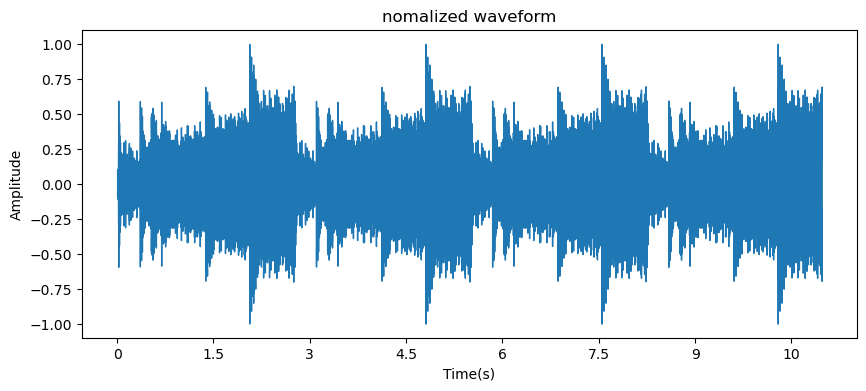

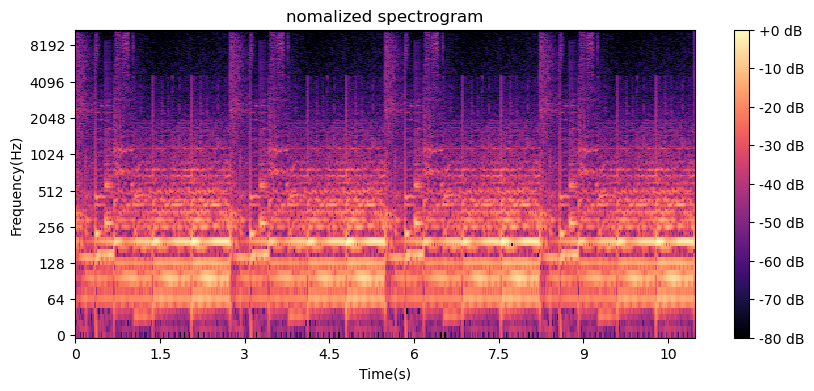

In [100]:
# plot normalized waveform and generate its spectrogram
normalize_y1 = normalize_audio(y1)
waveform(normalize_y1,sr1,title='nomalized waveform') 
spectrogram(normalize_y1,sr1,title='nomalized spectrogram') 

### 2.5 reading and resource

#### 2.5.1 audio concepts
于2.1中

#### 2.5.2 librosa documentation

##### 2.5.2.1 上传音频文件

In [ ]:
y, sr = librosa.load(path, sr=22050, mono=True, offset=0.0, duration=None, dtype=np.float32)

- path: 音频文件的路径（支持 .wav、.mp3、.ogg 等）。
- sr: 采样率（默认 22050 Hz）。设置为 None 可保留原始采样率。
- mono: 是否将音频转换为单声道。True 为单声道，False 为立体声。
- offset: 开始加载音频的时间（单位为秒）。
- duration: 加载的音频时长（单位为秒）。
- dtype: 返回的音频数据的数据类型（默认 np.float32）。

##### 2.5.2.2 绘制波形图

In [ ]:
librosa.display.waveshow(y, sr=22050, max_points=11025, x_axis='time', offset=0.0)

- y: 音频信号数据，可以是一维的时序数据。
- sr: 采样率，默认是 22050。
- max_points: 设置绘图中的最大采样点数，防止绘图过密。
- x_axis: 横轴表示方式，可以是 time（时间）、s（秒） 或 ms（毫秒）。
m- offset: 偏移量，以秒为单位，用于在显示时对数据进行时间偏移。

##### 2.5.2.3 绘制频谱图

In [ ]:
librosa.display.specshow(y,hop_length=512, x_axis=None, y_axis=None)

- y: 输入数据矩阵，可以是时频特征图（例如 STFT、Mel 频谱图、MFCC 等）。
- sr: 采样率，默认是 22050。
- hop_length: STFT 的滑窗步长，影响时间轴显示的精度。
- x_axis: 横轴显示方式，可以是 time（时间）、frames（帧）、off（关闭）等。
- y_axis: 纵轴显示方式，常见的选项包括 linear（线性频率）、log（对数频率）、mel（梅尔频率）、cqt_note（恒定 Q 变换的音符标记）等。

##### 2.5.2.4 pitch shifting 高音移位
可使用 pitch_shift 函数将音频信号的音调调高或调低

In [ ]:
librosa.effects.pitch_shift(y, sr, n_steps, bins_per_octave=12, res_type='kaiser_best')

- y: 输入音频信号，通常是从 librosa.load 加载的 numpy 数组。
- sr: 音频的采样率。
- n_steps: 音高变化的步数，正数表示调高音调，负数表示调低音调。每步代表一个半音阶（semitone），例如n_steps=12 表示升高一个八度。
- bins_per_octave: 每个八度的音阶数，默认为 12，适用于十二平均律。
- res_type: 重采样算法类型，默认为 'kaiser_best'。可以设置为 'kaiser_fast'，以加快速度但稍微降低音质。

In [ ]:
# 调高音高（升高5个半音）
y_shifted_up = librosa.effects.pitch_shift(y, sr=sr, n_steps=5)

In [ ]:
# 调低音高（降低5个半音）
y_shifted_down = librosa.effects.pitch_shift(y, sr=sr, n_steps=-5)

##### 2.5.2.5 zero-crossing rate 过零率
用于计算音频信号的过零率（Zero-Crossing Rate, ZCR）。
- 过零率是指信号中经过零值的次数，在音频分析中可用于检测信号的变化和音色特征，特别是在区分噪声和有声部分时非常有用。
- 高过零率通常表示高频噪声或无调性声音（如打击乐器的音频），低过零率则更多出现在有调性或平滑的音频中（如人声或乐器演奏的音符）。

In [ ]:
librosa.feature.zero_crossing_rate(y, frame_length=2048, hop_length=512, center=True)

- y: 输入音频信号，是一个一维 numpy 数组（通常是从 librosa.load 中加载的音频数据）。
- frame_length: 帧的长度，表示每个计算窗口的样本数，默认为 2048。
- hop_length: 跳帧长度，定义每次移动多少样本，默认为 512。
- center: 是否将信号居中，以使计算窗口居中在当前帧，默认为 True。

- 返回值：返回一个形状为 (1, t) 的 numpy 数组，其中 t 是帧数，值为每帧的过零率。

##### 2.5.2.6 短时傅里叶变换

In [ ]:
D = librosa.stft(y, n_fft=2048, hop_length=None)

- y: 输入的音频时序数据。
- n_fft: FFT 的窗口大小（默认为 2048）。
- hop_lengmth: STFT 滑窗的步长。如果为 None，则默认为 n_fft // 4。

##### 2.5.2.7 逆短时傅里叶变换，返回时域信号

In [ ]:
y = librosa.istft(D, hop_length=None)

- D: 输入的复数 STFT 矩阵。
- hop_length: 步长。如果为 None，默认为 win_length // 4。

##### 2.5.2.8 去除音频信号开头和结尾的静音

In [ ]:
y_trimmed, index = librosa.effects.trim(y, top_db=60)

- y: 输入的音频时序数据。
- top_db: 信号强度低于该 dB 值的部分将被认为是静音。